### Calculate the numper of pixels in each (cell, vasc) mask for each slice in each stack

In [1]:
# import

%load_ext autoreload
%autoreload 2

import os, sys

cwd = os.getcwd()
tmpPath, tmpFolder = os.path.split(cwd)
#sys.path.append(os.path.dirname(os.getcwd()))
print('tmpPath:', tmpPath)
sys.path.append(tmpPath)


import numpy as np

import bimpy

tmpPath: /home/cudmore/Sites/saNode/python


/home/cudmore/anaconda3/envs/aics_env/lib/python3.6/site-packages/skan/csr.py:21: NumbaDeprecationWarning: The 'numba.jitclass' decorator has moved to 'numba.experimental.jitclass' to better reflect the experimental nature of the functionality. Please update your imports to accommodate this change and see https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#change-of-jitclass-location for the time frame.
  @numba.jitclass(csr_spec)


In [2]:
def zDensity(stackData, tiffHeader=None):
    """
    return percent of pixels a mask occupies
    """
    
    '''
    if tiffHeader is not None:
        voxelVolume = tiffHeader['xVoxel'] * tiffHeader['yVoxel'] * tiffHeader['zVoxel']
    else:
        voxelVolume = 1
    '''
    numSlices = stackData.shape[0]
    sliceDen = stackData.shape[1] * stackData.shape[2]
    zDen = np.ndarray(numSlices)
    for i in range(numSlices):
        maskPixels = stackData[i,:,:]
        maskPixels = np.sum(maskPixels)
        if maskPixels == 0:
            zDen[i] = np.nan
        else:
            zDen[i] = maskPixels / sliceDen * 100
            #zDen[i] = maskPixels * voxelVolume
    return zDen

def zSNR(stackData, tiffHeader=None):
    """
    return snr for each slice
    """
    
    numSlices = stackData.shape[0]
    #sliceDen = stackData.shape[1] * stackData.shape[2]
    zDen = np.ndarray(numSlices)
    for i in range(numSlices):
        maskPixels = stackData[i,:,:]
        
        theMin = np.min(maskPixels)
        theMax = np.max(maskPixels)

        snrRange = theMax - theMin + 1
                
        zDen[i] = snrRange

    return zDen


In [3]:

folderPath = '/Volumes/ThreeRed/nathan/20200717/aicsAnalysis'
folderPath = '/home/cudmore/data/20200717/aicsAnalysis'

prefixStr = '20200717__A01_G001_'
nRow = 11
nCol = 4

basePath = '/Volumes/ThreeRed/nathan/20200717/aicsAnalysis/20200717__A01_G001_0014'
basePath = '/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0014'

# raw
path_ch1 = basePath + '_ch1.tif'
path_ch2 = basePath + '_ch2.tif'

data_ch1, tiffHeader_ch1 = bimpy.util.bTiffFile.imread(path_ch1)
data_ch2, tiffHeader_ch2 = bimpy.util.bTiffFile.imread(path_ch2)

snr_ch1 = zSNR(data_ch1)
snr_ch2 = zSNR(data_ch2)

# mask
maskPath_ch1 = basePath + '_ch1_mask.tif'
maskPath_ch2 = basePath + '_ch2_mask.tif'

mask_ch1, tmpTiffHeader_ch1 = bimpy.util.bTiffFile.imread(maskPath_ch1)
mask_ch2, tmpTiffHeader_ch2 = bimpy.util.bTiffFile.imread(maskPath_ch2)

maskPercent_ch1 = zDensity(mask_ch1)
maskPercent_ch2 = zDensity(mask_ch2)

#
numSlices = data_ch1.shape[0] # shared b/w ch1 and ch2
#snrList = [snr_ch2]
#maskPercentList = [maskPercent_ch2]
sliceList = [x for x in range(numSlices)]


In [4]:
import nathanGrid2 # to fetch snaked file order given (row,col) grid and to plot it

# specify the channel
channel = 1
#channel = 2 # does not look so good for CD-31 because of endocardium

tifDataList, tifMaxList, fileNameList, fileIdxMatrix = \
        nathanGrid2.myMakeGrid(folderPath, prefixStr, channel, nRow, nCol)

fileIdxList = fileIdxMatrix.ravel() # flatten 2d to 1d, we still need to know (nRow, nCol)

#print(tifDataList) # is None if not loaded
#print(tifMaxList) # is None if not loaded
for file in fileNameList:
    print(file)
print(fileIdxMatrix)
print(fileIdxList)


myMakeGrid() commonShape: (88, 740, 740)
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0001_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0002_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0003_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0004_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0008_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0007_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0006_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0005_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0009_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0010_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0011_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0012_ch1.tif
/home/cudmore/data/20200717/aicsAnalysis/20200717__A01_G001_0016_ch1.tif
/home/cudm

myMakeGrid() commonShape: (88, 740, 740)
please wait ... folderPath: /home/cudmore/data/20200717/aicsAnalysis
figWidth: figHeight: 11.0


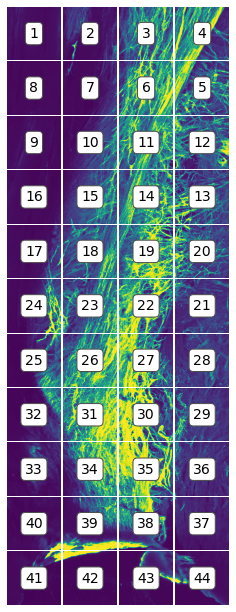

In [5]:
import nathanGrid2 # to fetch snaked file order given (row,col) grid and to plot it

# specify the channel
channel = 1
#channel = 2 # does not look so good for CD-31 because of endocardium

tifDataList, tifMaxList, fileNameList, fileIdxMatrix = nathanGrid2.myMakeGrid(folderPath, prefixStr, channel, nRow, nCol)

fileIdxList = fileIdxMatrix.ravel() # flatten 2d to 1d, we still need to know (nRow, nCol)

plotLabels = True
wSpace = 0.02 # a little white space between stacks
hSpace = 0.02
#wSpace = -0.1 # to remove border
#hSpace = -0.1
nathanGrid2.plotGrid(folderPath, nRow, nCol, fileNameList, fileIdxList, tifMaxList, plotLabels, wSpace, hSpace)


In [6]:
import matplotlib.pyplot as plt

plt.style.use("dark_background") # seaborn-paper

import matplotlib
params = {'legend.fontsize': 18,
      'axes.labelsize': 18,
      'axes.titlesize': 18,
      'ytick.labelsize' :14,
      'xtick.labelsize' :14,
      "xtick.bottom" : True,
      "ytick.left" : True,
      }
matplotlib.rcParams.update(params)

red: snr
white: mask percent


<AxesSubplot:label='67c57f74-b465-43ea-bb17-a24aa6d6dad1'>

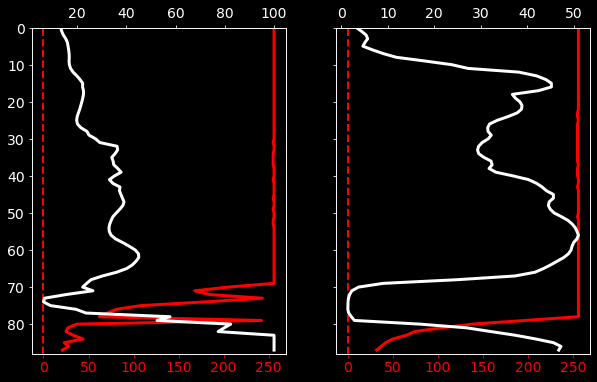

In [7]:
nRow_tmp = 1
nCol_tmp = 2
figWidth = 10
figHeight = 6

fig, axs = plt.subplots(nrows=nRow_tmp, ncols=nCol_tmp,
                            sharex=True, sharey=True, figsize=(figWidth,figHeight), constrained_layout=False)
axs = np.ravel(axs)
#axs = [axs] # when one (1,1)

#
# setup
myLineWidth = 3

def plotOneStack(snrList, maskPercentList, dataIdx, axs):
    """
    dataIdx: index into loaded data
    todo: pass one axs rather than (idx, axs[])
    """
    plotIdx = dataIdx

    x_snrMax = 0
    x_maskMax = 0
    snrThreshold = 0 # to plot vertical line
    secondAxesList = []
    
    #
    # plot
    snrMax = np.nanmax(snrList[plotIdx])
    if snrMax > x_snrMax:
        x_snrMax = snrMax

    maskMax = np.nanmax(maskPercentList[plotIdx])
    if maskMax > x_maskMax:
        x_maskMax = maskMax
        
    # left axis is snr
    axs.plot(snrList[plotIdx], sliceList, linewidth=myLineWidth, color='r')

    axs.axvline(x=snrThreshold, color='r', linewidth=myLineWidth-1, linestyle='--')
        
    # top axis is mask count
    ax2 = axs.twiny()
    #secondAxesList.append(ax2)

    #l2, = secondAxesList[plotIdx].plot(oneHullFraction, sliceList, linewidth=myLineWidth, color='w')
    l2, = ax2.plot(maskPercentList[plotIdx], sliceList, linewidth=myLineWidth, color='w')
 
    # reverse the y-axis (slices)
    axs.set_ylim(numSlices, 0) # 
    ax2.set_ylim(numSlices,0) # 

    labeltop = True #idx < nCol
    ax2.tick_params(axis='x', colors='w', labeltop=labeltop)
        
    axs.tick_params(axis='x', colors='r')

    return ax2

print('red: snr')
print('white: mask percent')

snrList = [snr_ch1]
maskPercentList = [maskPercent_ch1]
plotOneStack(snrList, maskPercentList, 0, axs[0])

snrList = [snr_ch2]
maskPercentList = [maskPercent_ch2]
plotOneStack(snrList, maskPercentList, 0, axs[1])

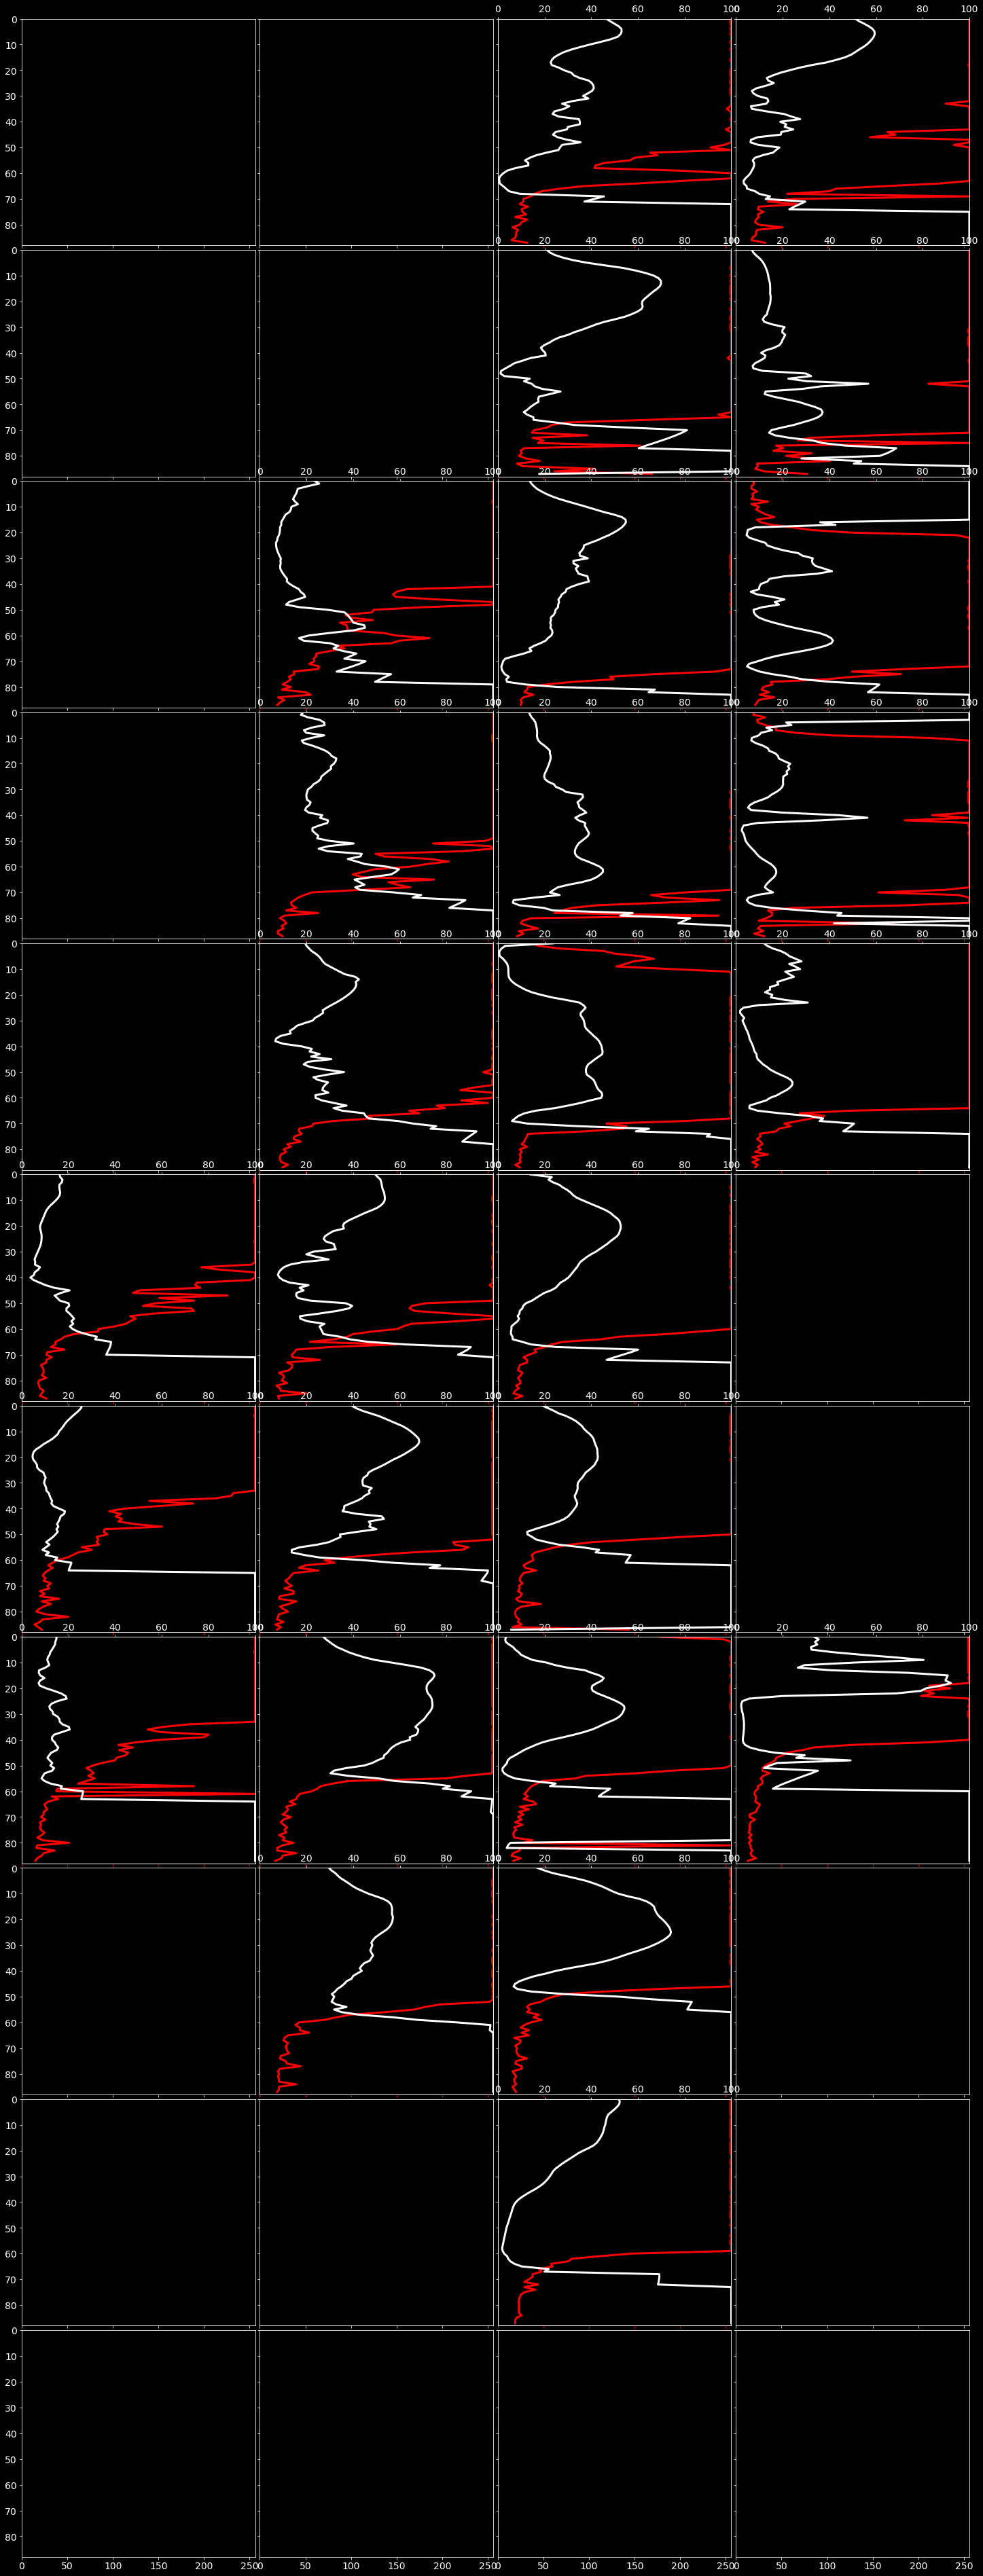

In [106]:
figWidth = 20 #nCol
heightMult = nRow / nCol
figHeight = figWidth * heightMult

fig, axs = plt.subplots(nrows=nRow, ncols=nCol,
                            sharex=True, sharey=True, figsize=(figWidth,figHeight), constrained_layout=False)
axs = np.ravel(axs)

x_snrMax = 0
x_maskMax = 0

secondAxesList = []

for idx, file in enumerate(fileNameList):
    #plotIdxFromMatrix = fileIdxList[idx] #
    
    stackData = tifDataList[idx]
    #if os.path.isfile(file):
    if stackData is not None:        
        # convert raw path to _mask path
        tmpPath, tmpFile = os.path.split(file)
        tmpFileNameNoExtension, tmpExt = tmpFile.split('.')
        maskFile = tmpFileNameNoExtension + '_mask.tif'
        maskPath = os.path.join(tmpPath, maskFile)
        # load mask
        maskData, maskHeader = bimpy.util.bTiffFile.imread(maskPath)
        
        snr = zSNR(stackData)
        maskPercent = zDensity(maskData)

        # max axis
        snrMax = np.nanmax(snr)
        if snrMax > x_snrMax:
            x_snrMax = snrMax

        maskMax = np.nanmax(maskPercent)
        if maskMax > x_maskMax:
            x_maskMax = maskMax

        # plot
        ax = axs[idx] # the idx'th element in axs[] which is 0,1,2,...
        secondAxis = plotOneStack([snr], [maskPercent], 0, ax)
        secondAxesList.append(secondAxis)
    else:
        secondAxesList.append(None)
        
for idx in range(len(axs)):
    axs[idx].set_xlim(0, x_snrMax) # so each plot looks same
    if secondAxesList[idx] is not None:
        secondAxesList[idx].set_xlim(0, x_maskMax) # so each plot looks same

# Pad each stack with some border white space
# Pad each stack with some border white space
wSpace = 0.02
hSpace = 0.02
plt.subplots_adjust(wspace=wSpace, hspace=hSpace)

#plt.show()